In [39]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime as dtm
import matplotlib as plt

In [102]:
df=pd.read_csv("data.csv", encoding = "ISO-8859-1")

## Data Cleaning
##### Turning string to other types

In [103]:
df.iloc[3]
#cost of goods sold (COGS)

ASIN                                                            B00R4ZL4P4
Product Title                   HomePop Chunky Textured Accent Chair, Teal
Model/StyleNumber                                              K6859-F1550
Total Sales                                                      $5,802.96
Shipped COGS - % of Total                                            2.11%
Shipped COGS - Prior Period                                            NaN
Shipped COGS - Last Year                                                 
Total Qty                                                               46
Shipped Units - % of Total                                           1.54%
Shipped Units - Prior Period                                           NaN
Shipped Units - Last Year                                                
Customer Returns                                                         0
Free Replacements                                                        0
Date                     

In [104]:
#change percents to decimal floats
df['Shipped Units - % of Total']= df['Shipped Units - % of Total'].str.rstrip('%').astype('float') / 100.0
df['Shipped COGS - % of Total']=df['Shipped COGS - % of Total'].str.rstrip('%').astype('float') / 100.0

In [105]:
#change dollar to float
df['Total Sales']= df['Total Sales'].str.replace(',', '').str.replace('$', '').astype('float')
df['Drop Ship Sales']= df['Drop Ship Sales'].str.replace(',', '').str.replace('$', '').str.replace('(', '').str.replace(')', '').astype('float')


In [106]:
#turn date to datetime
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)

In [107]:
Total_sales=df['Total Sales'].sum()+df['Drop Ship Sales'].sum()

In [108]:
df['Drop Ship Sales'].sum()/Total_sales

0.17733707554901382

In [109]:
Total_sales

22352248.099999998

In [110]:
totqty=df['Total Qty'].sum()+df['Drop Ship Qty'].sum()

In [111]:
df['Drop Ship Qty'].sum()/totqty

0.1856272140835048

## Drop ship accounts for  17.73% of sales and 18.56% of order quantity

In [112]:
#saving to csv 
df.to_csv('Amazon_Sales.csv',index=False)

# Time series Analysis

(0, 45000)

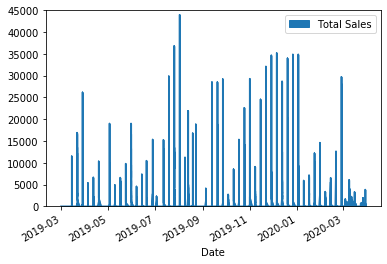

In [154]:
sales_timeseries = df.plot.area(x='Date', y='Total Sales')
sales_timeseries.set_ylim(0,45000)

(0, 45000)

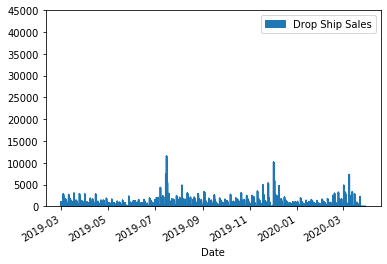

In [153]:
drpshp_timeseries = df.plot.area(x='Date', y='Drop Ship Sales')
drpshp_timeseries.set_ylim(0,45000)

# Create date indexed on Total Sales
### There are 282 days recorded overall.
### Daily sales data by Amazon is unreliable. The peaks are created because total sales is updated in inconsistent intervals that sums all of the sales before the last update, which could take days to a week. Drop ship sales are updated daily and could be a more reliable indicator.
### This also means that people might still be buying furniture on Amazon during the COVID crisis, but it hasn't updated yet. The downward trend of dropship says people are still buying, albeit in smaller quantities.

### The highest selling "Day" in amazon in february 28, 2020, but again, Amazon daily trends are unreliable. Monthly is more reliable as will be shown later.

In [199]:
dated=df.groupby(['Date']).sum()
dated.iloc[10:25]

,Total Sales,Shipped COGS - % of Total,Total Qty,Shipped Units - % of Total,Customer Returns,Free Replacements,Drop Ship Qty,Drop Ship Sales,Year,Month,Week
Date,,,,,,,,,,,
2019-03-15,239300.32,1.0000,3385.0,1.0011,186.0,32.0,264.0,18774.71,595605,885,3245
2019-03-18,0.00,0.0000,0.0,0.0000,0.0,0.0,695.0,47805.38,226128,336,1344
2019-03-19,0.00,0.0000,0.0,0.0000,0.0,0.0,246.0,17090.35,147387,219,876
2019-03-20,0.00,0.0000,0.0,0.0000,0.0,0.0,257.0,17163.08,147387,219,876
2019-03-21,0.00,0.0000,0.0,0.0000,0.0,0.0,332.0,22222.40,157482,234,936
2019-03-22,366941.93,0.9994,5172.0,1.0009,290.0,47.0,139.0,9214.77,577434,858,3432
2019-03-25,0.00,0.0000,0.0,0.0000,0.0,0.0,805.0,55707.54,244299,363,1573
2019-03-26,0.00,0.0000,0.0,0.0000,0.0,0.0,167.0,11991.82,125178,186,806
2019-03-27,0.00,0.0000,0.0,0.0000,0.0,0.0,292.0,20268.68,169596,252,1092


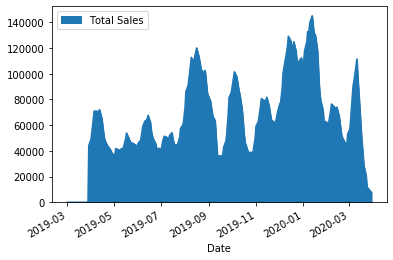

In [200]:
#this is a rolling average to see what the real Amazon total sales should look like
dated.rolling(21, win_type='triang').mean().plot.area(y='Total Sales')

(0, 45000)

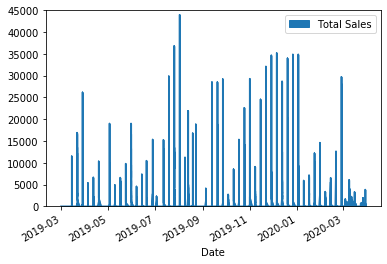

In [201]:
sales_timeseries = df.plot.area(x='Date', y='Total Sales')
sales_timeseries.set_ylim(0,45000)

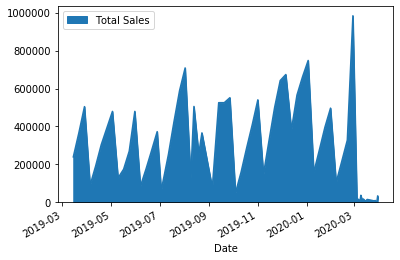

In [116]:
#get rid of zero total sales days and see area graph
dated_nozero =  dated[(dated[['Total Sales']] != 0).all(axis=1)]
dated_nozero.plot.area(y='Total Sales')

In [167]:
dated.iloc[240:270]

,Total Sales,Shipped COGS - % of Total,Total Qty,Shipped Units - % of Total,Customer Returns,Free Replacements,Drop Ship Qty,Drop Ship Sales,Year,Month,Week
Date,,,,,,,,,,,
2020-02-10,0.00,0.0000,0.0,0.0000,0.0,0.0,277.0,26468.44,161600,160,560
2020-02-11,0.00,0.0000,0.0,0.0000,0.0,0.0,93.0,7296.88,80800,80,280
2020-02-12,0.00,0.0000,0.0,0.0000,0.0,0.0,82.0,8025.35,74740,74,259
2020-02-13,0.00,0.0000,0.0,0.0000,0.0,0.0,78.0,7519.76,84840,84,294
2020-02-14,214817.97,1.0001,2339.0,1.0001,261.0,35.0,70.0,6741.17,603980,598,2093
2020-02-17,0.00,0.0000,0.0,0.0000,0.0,0.0,235.0,21746.92,151500,150,600
2020-02-18,0.00,0.0000,0.0,0.0000,0.0,0.0,84.0,7738.76,84840,84,336
2020-02-19,0.00,0.0000,0.0,0.0000,0.0,0.0,85.0,8482.90,74740,74,296
2020-02-20,0.00,0.0000,0.0,0.0000,0.0,0.0,56.0,5155.08,66660,66,264


# When are there the most sales?

### Due to interval lag with amazon sales, there are some inconsistencies, but the best sales seems to be during August-September, and Late November-December-January (Holidays)

In [124]:
dated.sort_values(by=['Total Sales'], ascending= False).head()

,Total Sales,Shipped COGS - % of Total,Total Qty,Shipped Units - % of Total,Customer Returns,Free Replacements,Drop Ship Qty,Drop Ship Sales,Year,Month,Week
Date,,,,,,,,,,,
2020-02-28,983980.14,1.0001,10722.0,1.0012,1054.0,150.0,111.0,10954.58,797900,790,3555
2020-01-03,748146.84,0.9997,8154.0,0.9982,563.0,117.0,75.0,5941.65,715080,354,354
2019-08-02,708850.90,1.0005,8447.0,0.9992,440.0,135.0,119.0,9553.88,751068,2976,11532
2019-12-06,673880.96,1.0006,7219.0,1.0007,551.0,93.0,107.0,11044.05,736935,4380,17885
2019-12-27,662471.46,1.0006,7221.0,0.9983,487.0,98.0,85.0,7963.40,734916,4368,18928


In [125]:
dated.sort_values(by=['Drop Ship Sales'], ascending= False).head()

,Total Sales,Shipped COGS - % of Total,Total Qty,Shipped Units - % of Total,Customer Returns,Free Replacements,Drop Ship Qty,Drop Ship Sales,Year,Month,Week
Date,,,,,,,,,,,
2019-12-02,0.0,0.0,0.0,0.0,0.0,0.0,840.0,76565.43,246318,1464,5978
2019-03-25,0.0,0.0,0.0,0.0,0.0,0.0,805.0,55707.54,244299,363,1573
2019-03-04,0.0,0.0,0.0,0.0,0.0,0.0,712.0,51136.27,234204,348,1160
2019-07-16,0.0,0.0,0.0,0.0,0.0,0.0,570.0,49509.93,187767,651,2697
2019-03-11,0.0,0.0,0.0,0.0,0.0,0.0,722.0,47999.21,214014,318,1166


In [95]:
monthly=df.groupby(['Month']).sum()[['Total Sales', 'Drop Ship Sales']]

In [143]:
monthly.sort_values(by=['Total Sales'], ascending= False)

,Total Sales,Drop Ship Sales
Month,,
12,2283989.25,341199.79
11,2154732.83,281498.10
1,2074111.41,243799.19
8,1961094.24,299547.07
9,1678945.98,235278.64
2,1630189.16,230024.09
5,1530889.33,290729.43
3,1369732.29,687124.31
7,1324760.56,426646.79


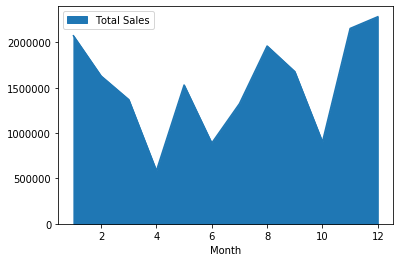

In [173]:
monthly.plot.area(y='Total Sales')

In [141]:
holiday_sales=monthly.sort_values(by=['Total Sales'], ascending= False)[0:3].sum()
holiday_sales_tot=holiday_sales[0]+holiday_sales[1]

In [142]:
holiday_sales_tot/Total_sales

0.33013818283450347

## Holidays account for around a third of all sales

In [176]:
weekly=df.groupby(['Week']).sum()[['Total Sales', 'Drop Ship Sales']]
weekly

,Total Sales,Drop Ship Sales
Week,,
1,748146.84,25043.70
2,157335.97,51753.68
3,275673.42,54169.09
4,396282.03,54890.79
5,496673.15,57941.93
6,103661.24,60566.60
7,214817.97,56051.60
8,327729.81,50085.52
9,983980.14,83028.18


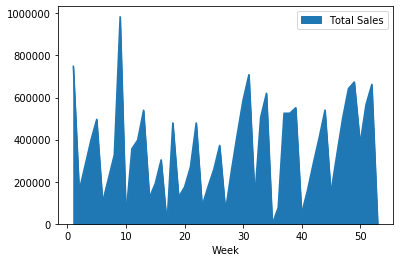

In [177]:
weekly.plot.area(y='Total Sales')

# Best and worst Models?

In [144]:
model_df=df.groupby(['Model/StyleNumber']).sum()


In [147]:
#Most money gained from a model is Parsons Classic  Dining Chair, Set of 2, Pewter Grey and Lattice Cream 
model_df.sort_values(by=['Total Sales'], ascending= False)

,Total Sales,Shipped COGS - % of Total,Total Qty,Shipped Units - % of Total,Customer Returns,Free Replacements,Drop Ship Qty,Drop Ship Sales,Year,Month,Week
Model/StyleNumber,,,,,,,,,,,
K6805-F2061,560963.04,1.4647,3684.0,0.8457,328.0,51.0,329.0,48116.60,262481,814,3310
K6384NP-A750,531551.19,1.5237,4635.0,1.1563,231.0,24.0,357.0,38564.11,228159,587,2357
K7116-YDQY-2,504771.85,1.3154,4146.0,0.9935,128.0,4.0,1724.0,210151.15,448267,1590,6575
K6499-B215,470520.22,1.3220,4176.0,1.0219,289.0,54.0,1188.0,129591.84,415925,1409,5799
K6171-B122,458131.82,1.2761,7276.0,1.7917,334.0,22.0,594.0,38810.46,327108,1008,4144
N5762-E155,377473.11,1.1714,11596.0,3.0492,370.0,110.0,3580.0,116131.82,607762,1995,8203
K6805-F2055,376326.57,1.1479,2567.0,0.6688,151.0,51.0,152.0,16751.30,240283,704,2857
N6354-A708,361141.93,0.9648,2772.0,0.6664,173.0,30.0,213.0,26493.00,228163,668,2716
K6499-B122,356687.10,1.1091,3419.0,0.9215,199.0,46.0,1129.0,114940.55,434105,1406,5764


In [148]:
#Most popular models are Tufted Square Storage Ottomans with Hinged Lid
model_df.sort_values(by=['Total Qty'], ascending= False)

,Total Sales,Shipped COGS - % of Total,Total Qty,Shipped Units - % of Total,Customer Returns,Free Replacements,Drop Ship Qty,Drop Ship Sales,Year,Month,Week
Model/StyleNumber,,,,,,,,,,,
N5762-E155,377473.11,1.1714,11596.0,3.0492,370.0,110.0,3580.0,116131.82,607762,1995,8203
K6171-B122,458131.82,1.2761,7276.0,1.7917,334.0,22.0,594.0,38810.46,327108,1008,4144
K6384NP-A750,531551.19,1.5237,4635.0,1.1563,231.0,24.0,357.0,38564.11,228159,587,2357
K6862-E846,233528.51,0.6172,4178.0,0.9559,244.0,18.0,444.0,23809.80,294801,780,3144
K6499-B215,470520.22,1.3220,4176.0,1.0219,289.0,54.0,1188.0,129591.84,415925,1409,5799
K7116-YDQY-2,504771.85,1.3154,4146.0,0.9935,128.0,4.0,1724.0,210151.15,448267,1590,6575
K6862-E843,258783.09,0.7046,4060.0,0.9567,212.0,31.0,405.0,24836.01,292775,796,3231
K2380-E155,235845.25,0.6054,3890.0,0.8622,415.0,67.0,1193.0,71135.29,490656,1494,6113
K6805-F2061,560963.04,1.4647,3684.0,0.8457,328.0,51.0,329.0,48116.60,262481,814,3310
